In [41]:
import pandas as pd
print(pd.__version__)
df = pd.read_csv('weather.csv')
df.info()
df.columns
df.describe()
df.shape
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

3.0.0
<class 'pandas.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 9962 non-null   str    
 1   humidity_percent     9962 non-null   float64
 2   pressure_hpa         9962 non-null   float64
 3   wind_speed_kmph      9962 non-null   float64
 4   cloud_cover_percent  9962 non-null   float64
 5   rainfall_mm          9962 non-null   float64
 6   sunshine_hours       9962 non-null   float64
 7   temperature_c        9962 non-null   float64
dtypes: float64(7), str(1)
memory usage: 622.8 KB


In [42]:
df.isnull().sum()

date                   0
humidity_percent       0
pressure_hpa           0
wind_speed_kmph        0
cloud_cover_percent    0
rainfall_mm            0
sunshine_hours         0
temperature_c          0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

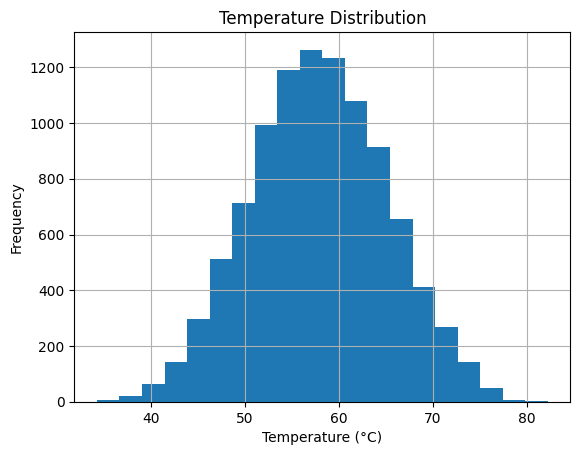

In [44]:
import matplotlib.pyplot as plt
df['temperature_c'].hist(bins=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

In [46]:
train_df=df[df["temperature_c"].notna()]
test_df= df[df["temperature_c"].isna()]

In [47]:
from sklearn.linear_model import LinearRegression
X = train_df[[
    'humidity_percent',
    'pressure_hpa',
    'wind_speed_kmph',
    'cloud_cover_percent',
    'rainfall_mm',
    'sunshine_hours']]
y=train_df[['temperature_c']]
model=LinearRegression()
model.fit(X, y)
p3=[5,96.0571445127932,1003.30384673619,7.38047982394846,45.9292453534193,4.7408887581029,5.93420452463244]
p4=[37.3712323230137,992.058537004905,10.2959191632154,48.7423698475453,43.0853355209257,6.27400071992761]

y_pred=model.predict(X_test)
  
print(y_pred)
print(y_test)
print(model.predict([p4]))

[[53.4326489 ]
 [56.76656527]
 [55.17712304]
 ...
 [59.19471271]
 [61.18223541]
 [63.11675965]]
6252    53.02
4684    56.94
1731    53.97
4742    68.22
4521    58.68
        ...  
6412    57.74
8285    58.04
7853    57.83
1095    60.34
6929    64.11
Name: temperature_c, Length: 2000, dtype: float64
[[57.11536483]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
y_pred=model.predict(X_test)
  
print(y_pred)
print(y_test)
print(model.predict([p4]))

[[53.4326489 ]
 [56.76656527]
 [55.17712304]
 ...
 [59.19471271]
 [61.18223541]
 [63.11675965]]
6252    53.02
4684    56.94
1731    53.97
4742    68.22
4521    58.68
        ...  
6412    57.74
8285    58.04
7853    57.83
1095    60.34
6929    64.11
Name: temperature_c, Length: 2000, dtype: float64
[[57.11536483]]


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # or LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [50]:
# Assuming you already extracted numeric features
X = df[['humidity_percent', 'pressure_hpa', 'wind_speed_kmph', 
        'cloud_cover_percent', 'rainfall_mm', 'sunshine_hours']]  # all numeric
y = df['temperature_c']
# Rows where temperature is known → training data
train_df = df[df['temperature_c'].notna()]

# Rows where temperature is missing → we want to predict these
predict_df = df[df['temperature_c'].isna()]



# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model_pipeline = Pipeline([
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [52]:
model_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionc

In [53]:
y_pred = model_pipeline.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score: 0.9345583479063245
MSE: 3.4013923198494753
